In [60]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.svm import SVC as SVM
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
import seaborn as sn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn import preprocessing

In [61]:
math_data = pd.read_csv('./alcohol_dataset/Maths.csv')
port_data = pd.read_csv('./alcohol_dataset/Portuguese.csv')

indian_names = pd.read_csv('./alcohol_dataset/Indian_Names.csv')

math_data.insert(1,'Name',indian_names['Name'])

df = math_data.select_dtypes(exclude=['int64'])
math_data = math_data.select_dtypes(exclude=['object'])

df.info()
math_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   Name        395 non-null    object
 2   sex         395 non-null    object
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Mjob        395 non-null    object
 7   Fjob        395 non-null    object
 8   reason      395 non-null    object
 9   guardian    395 non-null    object
 10  schoolsup   395 non-null    object
 11  famsup      395 non-null    object
 12  paid        395 non-null    object
 13  activities  395 non-null    object
 14  nursery     395 non-null    object
 15  higher      395 non-null    object
 16  internet    395 non-null    object
 17  romantic    395 non-null    object
dtypes: object(18)
memory usage: 55.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395

In [62]:
math_data_target = math_data['G3']

math_data = math_data.drop(['G3'], axis=1)

In [63]:

df = df.drop(['Name'], axis=1)
for i in df.columns:
    a = np.unique(df[i])
    df[i] = df[i].replace(a, list(range(len(a))))
# print(df.head)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      395 non-null    int64
 1   sex         395 non-null    int64
 2   address     395 non-null    int64
 3   famsize     395 non-null    int64
 4   Pstatus     395 non-null    int64
 5   Mjob        395 non-null    int64
 6   Fjob        395 non-null    int64
 7   reason      395 non-null    int64
 8   guardian    395 non-null    int64
 9   schoolsup   395 non-null    int64
 10  famsup      395 non-null    int64
 11  paid        395 non-null    int64
 12  activities  395 non-null    int64
 13  nursery     395 non-null    int64
 14  higher      395 non-null    int64
 15  internet    395 non-null    int64
 16  romantic    395 non-null    int64
dtypes: int64(17)
memory usage: 52.6 KB


In [64]:

for i in range(len(df.columns)):
    math_data.insert(i+len(df.columns)-4,df.columns[i],df[df.columns[i]].values)

# xd = pd.concat(math_data, df)


In [65]:
# xd = np.array(range(10))
# XD = np.array(range(10))/2
# scaler = MinMaxScaler().fit(xd)
# xd = scaler.transform(xd)
# scaler = MinMaxScaler().fit(XD)
# XD = scaler.transform(XD)
# XD

In [66]:
# mms=MinMaxScaler()
# math_data = mms.fit_transform(math_data)
# mms=MinMaxScaler()
# math_data_target = mms.fit_transform(math_data_target)


X_train, X_test, y_train, y_test = train_test_split(math_data, math_data_target, test_size=0.2, random_state=42)





# scaler = MinMaxScaler().fit(X_train)
# normalized_X = scaler.transform(X_train)
# scaler = MinMaxScaler().fit(X_test)
# normalized_X_test = scaler.transform(X_test)

# normalized_X = np.array(normalized_X)
# normalized_X_test = np.array(normalized_X_test)

y_train = np.array(y_train)
X_train = np.array(X_train)

lab = preprocessing.LabelEncoder()
scaler = MinMaxScaler().fit(y_train.reshape(-1, 1))
y_transformed = lab.fit_transform(y_train.reshape(-1, 1))
scaler = MinMaxScaler().fit(X_train.reshape(-1, 1))
x_transformed = lab.fit_transform(X_train.reshape(-1, 1))


# math_data_target = (math_data_target-math_data_target.min())/(math_data_target.max()-math_data_target.min())



c:\Users\Krzysztof\anaconda3\envs\xd\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\Krzysztof\anaconda3\envs\xd\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [89]:
def svm_list(i):
    # c=(100+i*10)/100
    c=(50+i*0.01)
    svm = SVM(C=c,kernel='rbf')
    svm.fit(X_train, y_train)
    return svm.score(X_test,y_test)

In [90]:
svml = [ svm_list(i) for i in range(1000)]

(np.argmax(svml),svml[np.argmax(svml)])

(611, 0.45569620253164556)

In [94]:
for i in range(10):
    rfc = RandomForestClassifier()
    rfc.fit(X_train, y_train)
    print([rfc.score(X_test, y_test)])

[0.35443037974683544]
[0.3924050632911392]
[0.34177215189873417]
[0.3924050632911392]
[0.4050632911392405]
[0.3924050632911392]
[0.3924050632911392]
[0.4050632911392405]
[0.4050632911392405]
[0.4177215189873418]


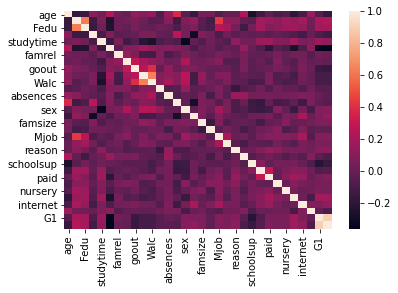

In [91]:
mdc = math_data.corr(method='spearman')
sn.heatmap(mdc)
plt.show()

In [70]:
[i for i in range(10,20,2)]

[10, 12, 14, 16, 18]

In [92]:
mdc_1dim = mdc.values.reshape(-1,1).tolist()
for i in range(len(mdc)):
    for j in range(len(mdc)):
        mdc_1dim[i*len(mdc)+j].append([i,j])
mdc_1dim.sort(key = lambda x:x[0])
mdc_1dim=mdc_1dim[::-1][32:]
mdc_1dim=[mdc_1dim[i] for i in range(0,len(mdc_1dim),2)][::-1]

for i in range(10):
    print([mdc_1dim[i][0],mdc.columns[mdc_1dim[i][1][0]], mdc.columns[mdc_1dim[i][1][1]]] )


[-0.36235740907605, 'G2', 'failures']
[-0.34605156240484386, 'G1', 'failures']
[-0.33682484876587193, 'sex', 'studytime']
[-0.3106303196400544, 'address', 'traveltime']
[-0.2797968784330127, 'address', 'school']
[-0.2645465096029045, 'higher', 'failures']
[-0.26402115320808883, 'Walc', 'studytime']
[-0.26274605645536775, 'schoolsup', 'age']
[-0.24237265070891245, 'failures', 'Medu']
[-0.23661643604533153, 'failures', 'Fedu']


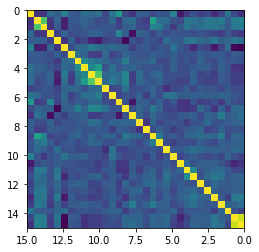

In [93]:
# grid = [for i in range(len(mdc)]
plt.imshow(mdc, extent=[15,0, 15, 0])
plt.show()